In [4]:
import re
import pandas as pd
import numpy as np



data = pd.read_csv("Embedded_HateSpeechDetection.csv")
print(data['Label'].value_counts())


Label
0    10496
1     7100
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
texts = data.drop(columns=['Text','Label','Tokens'])
labels = data['Label']

X_train, X_temp, y_train, y_temp = train_test_split(texts, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.66666, random_state=42)
X_train.shape, X_test.shape, X_val.shape

((12317, 200), (3520, 200), (1759, 200))

In [7]:
y_train.value_counts()

Label
0    7370
1    4947
Name: count, dtype: int64

# Imbalanced data:
From the above output, we can observe that there is an imbalance in 'Label' column in the training dataset as we can see there are 7370 instances of label '0' where as there are only 4947 instances of label '1'. This would significantly effect model training because models trained on this dataset might be biased towards the majority class (non-hate speech) and may not perform as well in identifying hate speech instances.

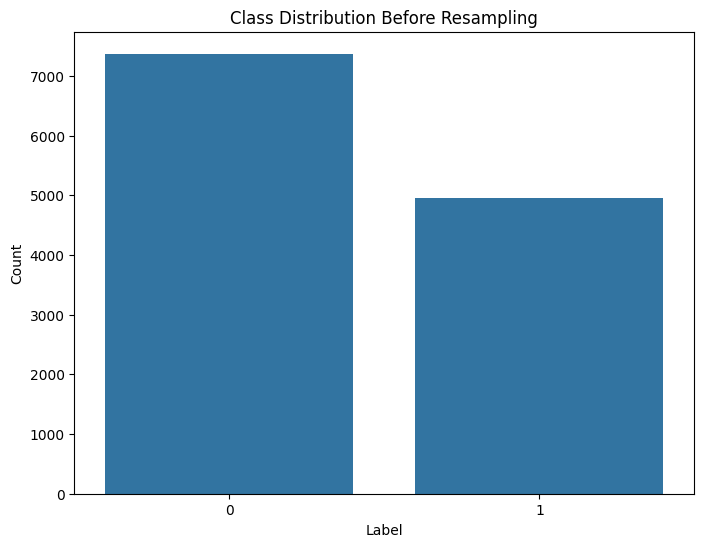

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of classes before sampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution Before Resampling')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Oversampling:
When we are using an imbalanced dataset, we can oversample the minority class using replacement. This technique used to handle imbalanced data is called oversampling.


In [9]:

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train,y_train)
print("Oversampled class distribution:\n", y_over.value_counts())

Oversampled class distribution:
 Label
0    7370
1    7370
Name: count, dtype: int64


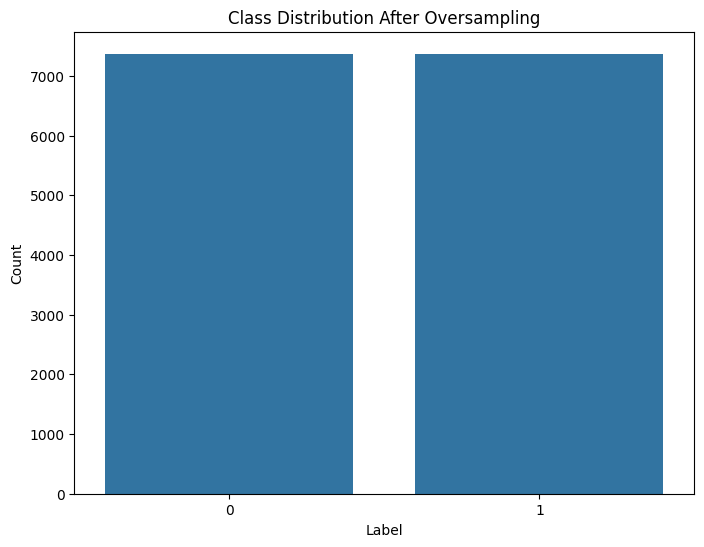

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_over)
plt.title('Class Distribution After Oversampling')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# SMOTE:
 Synthetic Minority Oversampling Technique or SMOTE, which is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t adon’ty new information to the model. In SMOTE new instances are synthesized from the existing data. 

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train,y_train)

print("Oversampled dataset shape using SMOTE:\n", y_smote.value_counts())

Oversampled dataset shape using SMOTE:
 Label
0    7370
1    7370
Name: count, dtype: int64


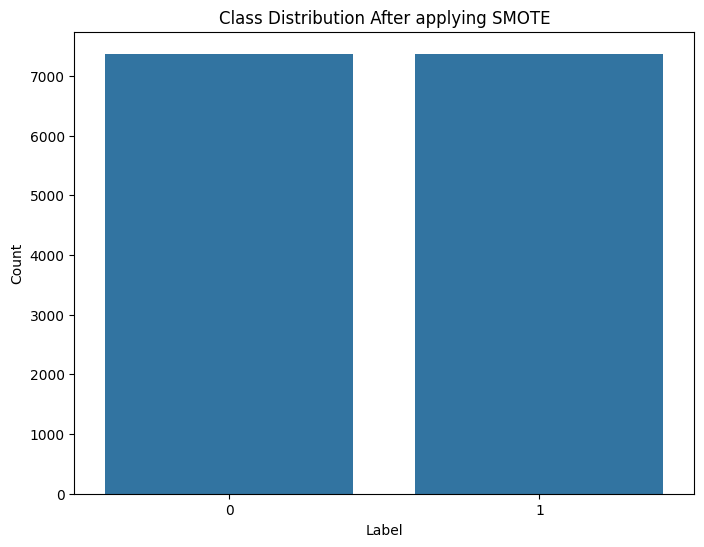

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote)
plt.title('Class Distribution After applying SMOTE')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()